# 热点问题发现

## 1.中文文本预处理

In [1]:
import jieba
import pandas as pd
import jieba.posseg as pseg
from jieba import analyse
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('shuju3.csv')
data.head()

,留言编号,留言用户,留言主题,留言时间,留言详情,反对数,点赞数
0,188006,A000102948,A3区一米阳光婚纱艺术摄影是否合法纳税了？,2019/2/2811:25:05,座落在A市A3区联丰路米兰春天G2栋320，一家名叫一米阳光婚纱艺术摄影的影楼，据说年单这一...,0,0
1,188007,A00074795,咨询A6区道路命名规划初步成果公示和城乡门牌问题,2019/2/1420:00:00,A市A6区道路命名规划已经初步成果公示文件，什么时候能转化成为正式的成果，希望能加快完成的路...,0,1
2,188031,A00040066,反映A7县春华镇金鼎村水泥路、自来水到户的问题,2019/7/1918:19:54,本人系春华镇金鼎村七里组村民，不知是否有相关水泥路到户政策和自来水到户政策，如政府主导投资村...,0,1
3,188039,A00081379,A2区黄兴路步行街大古道巷住户卫生间粪便外排,2019/8/1911:48:23,靠近黄兴路步行街，城南路街道、大古道巷、一步两搭桥小区（停车场东面围墙外），第一单元一住户卫...,0,1
4,188059,A00028571,A市A3区中海国际社区三期与四期中间空地夜间施工噪音扰民,2019/11/2216:54:42,A市A3区中海国际社区三期四期中间，即蓝天璞和洲幼儿园旁边那块空地一直处于三不管状态，物业不...,0,0


In [2]:
data['留言内容'] = data['留言主题'] + data['留言详情']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4326 entries, 0 to 4325
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   留言编号    4326 non-null   int64 
 1   留言用户    4326 non-null   object
 2   留言主题    4326 non-null   object
 3   留言时间    4326 non-null   object
 4   留言详情    4326 non-null   object
 5   反对数     4326 non-null   int64 
 6   点赞数     4326 non-null   int64 
 7   留言内容    4326 non-null   object
dtypes: int64(3), object(5)
memory usage: 270.5+ KB


In [3]:
# 选择要保留的列
columns_to_keep = ['留言主题', '反对数', '点赞数']
data_new = data[columns_to_keep]
data_new.head()

,留言主题,反对数,点赞数
0,A3区一米阳光婚纱艺术摄影是否合法纳税了？,0,0
1,咨询A6区道路命名规划初步成果公示和城乡门牌问题,0,1
2,反映A7县春华镇金鼎村水泥路、自来水到户的问题,0,1
3,A2区黄兴路步行街大古道巷住户卫生间粪便外排,0,1
4,A市A3区中海国际社区三期与四期中间空地夜间施工噪音扰民,0,0


##### 分词、停词处理

In [4]:
# 获取停用词
def load_stopwords(stopwords_file):
    stopwords = set()
    with open(stopwords_file, 'r', encoding='utf-8') as f:
        for line in f:
            stopwords.add(line.strip())
    return stopwords

In [5]:
stopwords = load_stopwords('哈工大停用词表.txt')
#stopwords

In [6]:
# 加载文档集，对文档集过滤词性和停用词
def filter_documents(data_path, stopwords):
    documents = []
    with open(data_path, 'r', encoding='utf-8') as f:
        for line in f:
            document = []
            words = pseg.cut(line.strip())
            for word, flag in words:
                if flag.startswith('n') and word not in stopwords and len(word) > 1:
                    document.append(word)
            documents.append(document)
    return documents

In [7]:
new_documents = filter_documents('shuju3.csv',stopwords)
new_documents = new_documents[1:]
# 展示文本处理后的第一个句子
new_documents[0]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/cr/ywvw0phn6pz14brg34z9p0p40000gn/T/jieba.cache
Loading model cost 0.351 seconds.
Prefix dict has been built successfully.


['一米阳光',
 '婚纱',
 '艺术摄影',
 '合法',
 '纳税',
 '米兰',
 '一米阳光',
 '婚纱',
 '艺术摄影',
 '影楼',
 '工作室',
 '营业额',
 '居民楼',
 '时间',
 '税务局',
 '一米阳光',
 '纳税']

In [8]:
# 将经过处理后的词拼接成句子
sentences = []
for text in new_documents:
    sentences.append(''.join(text))
sentences[:5]

['一米阳光婚纱艺术摄影合法纳税米兰一米阳光婚纱艺术摄影影楼工作室营业额居民楼时间税务局一米阳光纳税',
 '道路命名规划成果城乡门牌道路命名规划成果文件成果路名规范道路名牌名牌农村门牌号地方充分发挥路名地名行政区划门牌',
 '春华金鼎村水泥路春华金鼎村村民水泥路政策政策政府村民部分集资个人意见形象工程民生问题部分村组油沙路水泥路村组路灯浪费资源乡间部分地区农田山区家庭用水地方政府部分形象工程资金水泥路大家政府农民实事',
 '黄兴路步行街古道住户卫生间粪便外排黄兴路步行街南路街道古道停车场围墙单元住户卫生间粪便人行马路居民恶心粪便外排住户表面原因居民卫生间外排管道布管部门百姓城市美化全国文明城市细节家园',
 '中海国际社区空地噪音扰民中海国际社区蓝天和洲幼儿园空地状态物业城管市政建筑工地土渣空地用土状态挖土机挖土卡车噪音高达分贝城管干部工作人员业主电话城管人员现场噪音情况业主态度强硬分贝城管专业城管工作人员有效期渣土空地御园噪音扰民部门噪音国家标准市政府大家宁静']

##### 使用TF-IDF统计关键词

In [9]:
import jieba.analyse
guanjiancis = []
for sentence in sentences:
    guanjiancis.append(jieba.analyse.extract_tags(sentence,topK = 5))
guanjiancis[:5]

[['一米阳光', '艺术摄影', '婚纱', '纳税', '影楼'],
 ['门牌', '成果', '名牌', '道路', '命名'],
 ['水泥路', '金鼎村', '形象工程', '春华', '村组'],
 ['外排', '黄兴路', '卫生间', '住户', '粪便'],
 ['噪音', '城管', '空地', '扰民', '分贝']]

##### 统计关键词词频并展示词频最高的十个词

In [10]:
from collections import Counter
zongdecis = []
for i in guanjiancis:
    for j in i:
        zongdecis.append(j)
Counter(zongdecis).most_common(10)

[('业主', 491),
 ('西地省', 248),
 ('开发商', 195),
 ('扰民', 177),
 ('居民', 156),
 ('物业', 155),
 ('噪音', 141),
 ('社区', 140),
 ('街道', 133),
 ('地铁', 111)]

##### 关键词词云展示

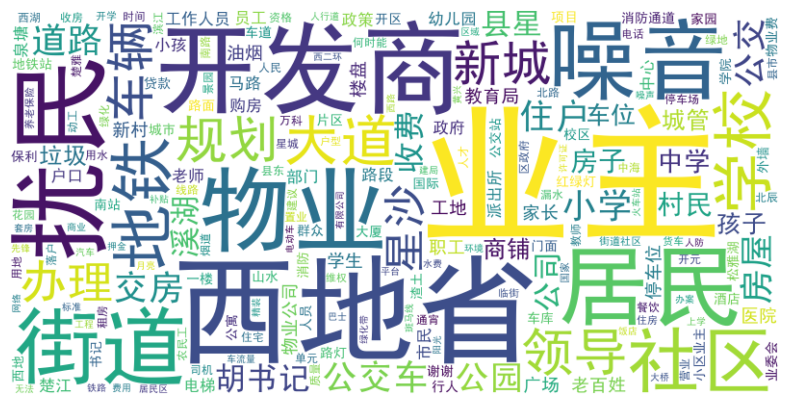

In [11]:
# 将关键词拼接成字符串
all_guanjianci = ''
for guanjianci in guanjiancis:
    all_guanjianci += ' '.join(guanjianci)
font_path='/Users/zhengmingyu/anaconda3/envs/pytorch/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf'
# 初始化词云
wordcloud = WordCloud(width=800, height=400, background_color="white",font_path=font_path).generate(all_guanjianci)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 基于Word2Vec的关键词聚类模型

In [12]:
import sys
import gensim
import sklearn
from gensim.models import Word2Vec

# 训练word2vec模型
model = Word2Vec(guanjiancis, vector_size=200, window=25, min_count=1, sg=0, epochs=20)
model.wv.save_word2vec_format('words_data.vector', binary=False)
model.save('words.model')

In [13]:
# 加载模型
import gensim.models as word2vec
def load_word2vec_model(w2v_path):
    model = word2vec.Word2Vec.load(w2v_path)
    return model
model = load_word2vec_model("words.model")

In [14]:
def calculate_most_similar(self, word):
    similar_words = self.wv.most_similar(word)
    print(word)
    for term in similar_words:
        print(term[0], term[1])
# 展示与“社区”最相似的关键词
calculate_most_similar(model, "社区")

社区
村民 0.999762773513794
城管 0.9997530579566956
垃圾 0.9997448921203613
部门 0.9996901154518127
住户 0.9996850490570068
新村 0.9996846318244934
家园 0.9996819496154785
楚江 0.9996582269668579
大厦 0.9996511340141296
菜市场 0.9996509552001953


In [15]:
import numpy as np
words = []#词向量中的词
tokens = []#词向量中词所对应的向量
for word in model.wv.index_to_key:
    tokens.append(list(model.wv[word]))
    words.append(word)
tokens = np.array(tokens)

##### 做一些近义词的替换和名词的去除

In [16]:
for j,i in enumerate(zongdecis):
    if i == '西地省' or i == '开发商':
        zongdecis.remove(i)
    if i == '分贝' or i == '噪声':
        zongdecis[j] = '噪音'

In [17]:
vectors = []
for ci in zongdecis:
    for i,j in enumerate(words):
        if ci==j:
            vectors.append(tokens[i])

In [18]:
#针对总的词聚类
from sklearn.cluster import KMeans
n_clusters=4
kmeans=KMeans(n_clusters=n_clusters,random_state=2021)
labels=kmeans.fit_predict(vectors)
cluster_size1=[sum(labels==cluster_id) for cluster_id in range(n_clusters)]

In [19]:
cluster_size1

[4431, 2852, 3286, 10499]

In [20]:
lei = kmeans.labels_
label_0 = []
label_1 = []
label_2 = []
label_3 = []
for i,juzi in enumerate(zongdecis):
    if lei[i]==0:
        label_0.append(juzi)
    if lei[i]==1:
        label_1.append(juzi)
    if lei[i]==2:
        label_2.append(juzi)
    if lei[i]==3:
        label_3.append(juzi)

In [21]:
text0 = " ".join(label_0)
text1 = " ".join(label_1)
text2 = " ".join(label_2)
text3 = " ".join(label_3)

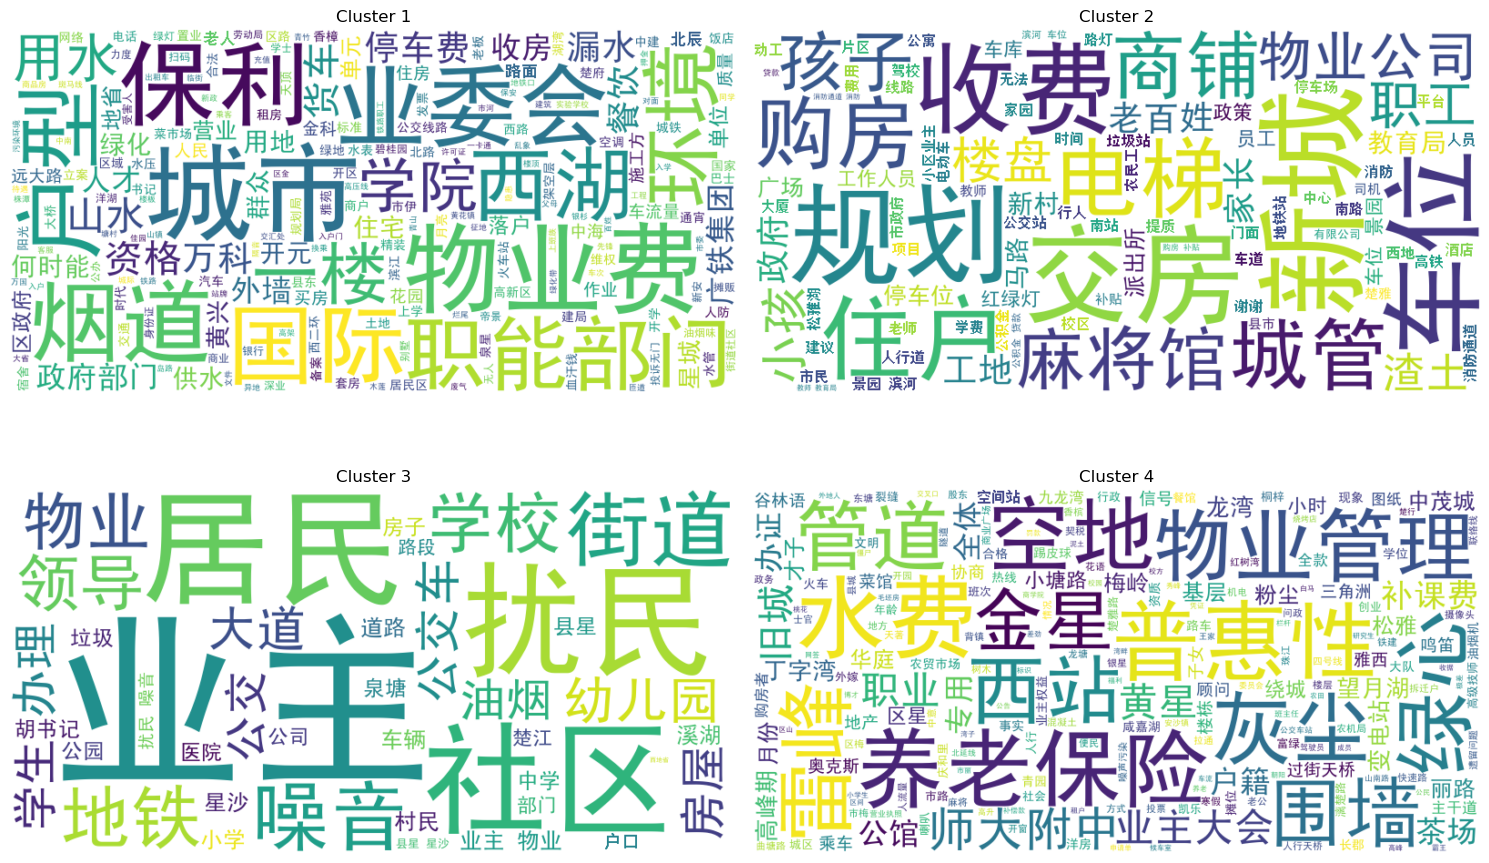

In [22]:
# 初始化词云对象
wordcloud0 = WordCloud(width=800, height=400, background_color="white",font_path=font_path).generate(text0)
wordcloud1 = WordCloud(width=800, height=400, background_color="white",font_path=font_path).generate(text1)
wordcloud2 = WordCloud(width=800, height=400, background_color="white",font_path=font_path).generate(text2)
wordcloud3 = WordCloud(width=800, height=400, background_color="white",font_path=font_path).generate(text3)

wordcloud_list = [wordcloud0,wordcloud1,wordcloud2,wordcloud3]

# 画图
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i in range(2):
    for j in range(2):
        index = i * 2 + j  # 计算在 wordcloud_list 中的索引
        axes[i, j].imshow(wordcloud_list[index], interpolation='bilinear')
        axes[i, j].axis("off")  # 关闭坐标轴
        axes[i, j].set_title(f"Cluster {index + 1}")

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

##### 句向量

In [23]:
b = []
for sentence in new_documents:
    string = ' '.join(sentence)
    b.append(string)

In [24]:
import gensim
from gensim.models.doc2vec import Doc2Vec
TaggededDocument = gensim.models.doc2vec.TaggedDocument
def deal(cut_sentences):
    train = []
    for i,text in enumerate(cut_sentences):
        word_list = text.split(' ')
        l = len(word_list)
        word_list[l-1] = word_list[l-1].strip()
        document = TaggededDocument(word_list,tags = [i])
        train.append(document)
    return train

In [25]:
c = deal(b)

In [26]:
c[:5]

[TaggedDocument(words=['一米阳光', '婚纱', '艺术摄影', '合法', '纳税', '米兰', '一米阳光', '婚纱', '艺术摄影', '影楼', '工作室', '营业额', '居民楼', '时间', '税务局', '一米阳光', '纳税'], tags=[0]),
 TaggedDocument(words=['道路', '命名', '规划', '成果', '城乡', '门牌', '道路', '命名', '规划', '成果', '文件', '成果', '路名', '规范', '道路', '名牌', '名牌', '农村', '门牌号', '地方', '充分发挥', '路名', '地名', '行政区划', '门牌'], tags=[1]),
 TaggedDocument(words=['春华', '金鼎村', '水泥路', '春华', '金鼎村', '村民', '水泥路', '政策', '政策', '政府', '村民', '部分', '集资', '个人', '意见', '形象工程', '民生问题', '部分', '村组', '油沙路', '水泥路', '村组', '路灯', '浪费资源', '乡间', '部分', '地区', '农田', '山区', '家庭', '用水', '地方', '政府', '部分', '形象工程', '资金', '水泥路', '大家', '政府', '农民', '实事'], tags=[2]),
 TaggedDocument(words=['黄兴路', '步行街', '古道', '住户', '卫生间', '粪便', '外排', '黄兴路', '步行街', '南路', '街道', '古道', '停车场', '围墙', '单元', '住户', '卫生间', '粪便', '人行', '马路', '居民', '恶心', '粪便', '外排', '住户', '表面', '原因', '居民', '卫生间', '外排', '管道', '布管', '部门', '百姓', '城市', '美化', '全国', '文明城市', '细节', '家园'], tags=[3]),
 TaggedDocument(words=['中海', '国际', '社区', '空地', '噪音', '扰民', '中海', '国际', '社区', '

In [27]:
def train(x,size=300):
    model = Doc2Vec(x,min_count=1,window=30,sample=1e-3,negative=5,workers=4,epochs=10)
    model.build_vocab(x)
    model.train(x,total_examples=model.corpus_count,epochs=model.epochs)
    return model

In [28]:
model_dm = train(c)
model_dm

In [29]:
str1 = u'噪声'
test = str1.split(' ')
inferred = model_dm.infer_vector(doc_words = test, alpha = 0.025)

In [30]:
sims = model_dm.docvecs.most_similar([inferred],topn=10)
sims
for count,sim in sims:
    print('相似度:',sim)
    sentence = c[count]
    words = ''
    print(sentence[0])

相似度: 0.8795662522315979
['白鹤', '麦潮', '娱乐城', '住户', '区麦', '潮量', '娱乐城', '学士', '街道', '白鹤', '隔音', '效果', '声音', '白鹤', '居民楼', '内设', '下户', '核实', '噪声', '标准', '环境保护局']
相似度: 0.8659905791282654
['枫林', '华润', '烂尾', '枫林', '华润', '烂尾']
相似度: 0.8649638295173645
['区洋', '街道', '工地', '噪音', '扰民', '区洋', '街道', '莲香园', '小区业主', '工地', '噪音', '扰民', '产生', '噪音', '声音', '中华人民共和国', '城市', '区域', '噪声', '标准', '商业', '工业', '昼间', '分贝', '分贝', '工地', '中华人民共和国', '环境', '噪声污染', '防治法', '规定', '城市', '市区', '噪声', '建筑物', '区域', '产生', '环境', '噪声污染', '建筑施工', '作业', '作业', '生产工艺', '作业', '作业', '人民政府', '主管部门', '至晨', '小区业主', '环境']
相似度: 0.8618549108505249
['区天健', '工地', '扰民', '领导', '区天健', '工地', '通宵', '作业', '噪音', '居民', '效果', '城管', '小时', '城管', '我会', '电话', '施工现场', '施工方', '事实', '工地', '通宵', '作业', '施工方', '万恶', '施工方', '行政', '手段', '施工方', '许可证', '区域', '措施', '噪音', '符合国家', '规范', '天健城', '许可证', '施工方', '许可证', '城管', '工作人员', '对方', '施工现场', '噪音', '措施', '噪音', '符合国家', '规范', '城管', '现场', '协商', '措施', '现场', '协商', '施工方', '措施', '睁一只眼', '居民', '权力', '职能部门', '工地', '晚班']
相似度: 0.8546

In [31]:
document_vectors = [model_dm.dv[c[i].tags[0]] for i in range(len(c))]
document_sentences = [c[i] for i in range(len(c))]

[0.50369513, 0.16805185, 0.13764668, 0.124897234, 0.116752625, 0.12083625, 0.053625643, 0.056161676, 0.06340952, 0.058877066, 0.039594546, 0.043055493, 0.030533055, 0.042553436, 0.032200385, 0.028226554, 0.012192003, 0.033776257]


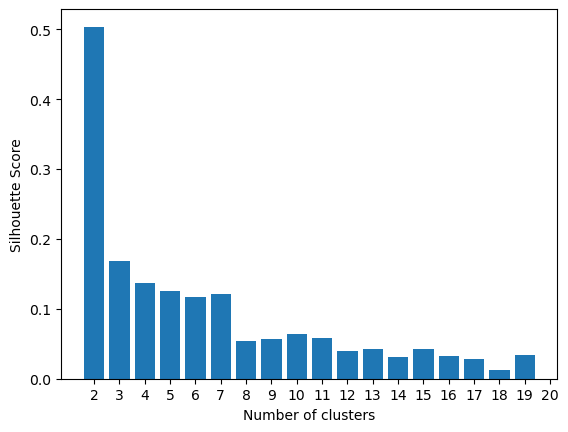

In [32]:
from sklearn.metrics import silhouette_score
s = [] 
cluster_list = range(2, 20)
for i in cluster_list:
    kmeans = KMeans(n_clusters = i, random_state = 2021)
    labels = kmeans.fit_predict(document_vectors)
    s.append(silhouette_score(document_vectors, kmeans.labels_,metric='euclidean')) 

print(s)  

# Plotting a bar graph to compare the results 
plt.bar(cluster_list, s) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
x=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)  # 设置横坐标的刻度为整数

plt.show()

In [33]:
from sklearn.cluster import KMeans
n_clusters=6
kmeans=KMeans(n_clusters=n_clusters,random_state=2021)
labels=kmeans.fit_predict(document_vectors)
cluster_size=[sum(labels==cluster_id) for cluster_id in range(n_clusters)]
print(cluster_size,len(c))

[787, 37, 2103, 1100, 41, 258] 4326


In [34]:
lei = kmeans.labels_

In [35]:
label_0 = []
label_1 = []
label_2 = []
label_3 = []
label_4 = []
label_5 = []
label_6 = []
for juzi in enumerate(c):
    if lei[juzi[0]]==0:
        label_0.append(juzi[1][0])
    if lei[juzi[0]]==1:
        label_1.append(juzi[1][0])
    if lei[juzi[0]]==2:
        label_2.append(juzi[1][0])
    if lei[juzi[0]]==3:
        label_3.append(juzi[1][0])
    if lei[juzi[0]]==4:
        label_4.append(juzi[1][0])
    if lei[juzi[0]]==5:
        label_5.append(juzi[1][0])
    if lei[juzi[0]]==6:
        label_6.append(juzi[1][0])

In [36]:
ju0 = []
for i in label_0:
    for j in i:
        if j!='小区' and j!='业主':
            ju0.append(j)
all_0 = " ".join(ju0)

ju1 = []
for i in label_1:
    for j in i:
        if j!='小区' and j!='业主':
            ju1.append(j)
all_1 = " ".join(ju1)

ju2 = []
for i in label_2:
    for j in i:
        if j!='小区' and j!='业主':
            ju2.append(j)
all_2 = " ".join(ju2)

ju3 = []
for i in label_3:
    for j in i:
        if j!='小区' and j!='业主':
            ju3.append(j)
all_3 = " ".join(ju3)

ju4 = []
for i in label_4:
    for j in i:
        if j!='小区' and j!='业主':
            ju4.append(j)
all_4 = " ".join(ju4)

ju5 = []
for i in label_5:
    for j in i:
        if j!='小区' and j!='业主':
            ju5.append(j)
all_5 = " ".join(ju5)

In [37]:
cip = []
for i in c:
    for j in i[0]:
        cip.append(j)
Counter(cip).most_common(10)

[('业主', 4223),
 ('领导', 2142),
 ('开发商', 1844),
 ('部门', 1830),
 ('政府', 1722),
 ('居民', 1700),
 ('公司', 1641),
 ('物业', 1473),
 ('西地省', 1431),
 ('情况', 1297)]

In [38]:
len(ju0)+len(ju1)+len(ju2)+len(ju3)+len(ju4)+len(ju5)

215068

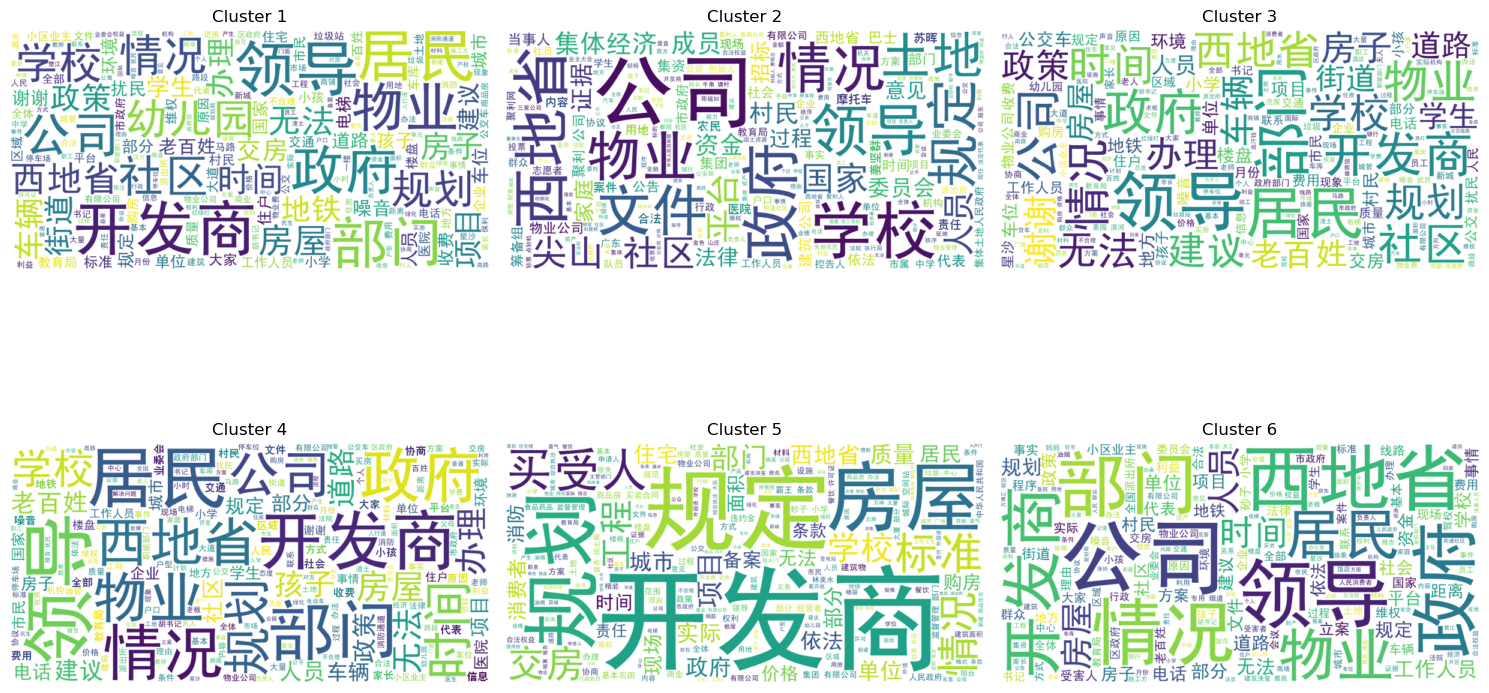

In [39]:
# 初始化词云对象
wordcloud0 = WordCloud(width=800, height=400, background_color="white",font_path=font_path).generate(all_0)
wordcloud1 = WordCloud(width=800, height=400, background_color="white",font_path=font_path).generate(all_1)
wordcloud2 = WordCloud(width=800, height=400, background_color="white",font_path=font_path).generate(all_2)
wordcloud3 = WordCloud(width=800, height=400, background_color="white",font_path=font_path).generate(all_3)
wordcloud4 = WordCloud(width=800, height=400, background_color="white",font_path=font_path).generate(all_4)
wordcloud5 = WordCloud(width=800, height=400, background_color="white",font_path=font_path).generate(all_5)
# wordcloud6 = WordCloud(width=800, height=400, background_color="white",font_path=font_path).generate(all_6)

wordcloud_list = [wordcloud0,wordcloud1,wordcloud2,wordcloud3,wordcloud4,wordcloud5]

# 画图
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i in range(2):
    for j in range(3):
        index = i * 3 + j  # 计算在 wordcloud_list 中的索引
        axes[i, j].imshow(wordcloud_list[index], interpolation='bilinear')
        axes[i, j].axis("off")  # 关闭坐标轴
        axes[i, j].set_title(f"Cluster {index + 1}")

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()